<h1> PCA (Principal Component Analysis) </h1>
 PCA is a dimensionality reduction technique used in data analysis and machine learning. It helps you to reduce the number of features in a dataset while keeping the most important information. It changes your original features into new features these new features don’t overlap with each other and the first few keep most of the important differences found in the original data.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
# Generate sample data - 3D data that we'll reduce to 2D
#np.random.seed(42)
n_samples = 300

# Create 3D data with some correlation
mean = [0, 0, 0]
cov = [[3, 2, 1],
       [2, 4, 1.5],
       [1, 1.5, 2]]
data_3d = np.random.multivariate_normal(mean, cov, n_samples)
data_3d

array([[ 2.50786732e-01,  9.19249305e-01, -5.12342727e-01],
       [ 2.40904460e-01,  1.39524367e+00,  4.43864405e-01],
       [ 6.90444757e-01,  2.82903337e+00, -2.81017516e-01],
       [-2.20326879e+00,  7.59336830e-01, -7.52615388e-01],
       [-1.27802853e+00, -5.02712555e+00, -2.58750947e+00],
       [ 1.89569856e+00,  2.58812792e+00,  2.64031956e+00],
       [-8.82012564e-02, -8.48778242e-01, -6.71854858e-01],
       [-7.93424897e-01, -5.38587649e+00, -2.83184006e+00],
       [ 1.28078088e+00, -7.60662771e-01,  3.30978678e-01],
       [-3.21239170e-01, -3.98108704e+00, -1.73771571e+00],
       [-1.39375288e+00, -1.52704681e-01, -4.70702143e-01],
       [-1.27269886e+00, -1.25689664e+00,  6.36449194e-01],
       [-6.20322428e-01, -2.01217844e+00, -1.22169942e+00],
       [-2.08253784e+00, -2.39253354e+00, -8.80435788e-01],
       [-6.63239702e-01,  1.33152752e+00,  8.40681001e-02],
       [-2.67522586e+00, -7.94819959e-01, -5.57150209e-01],
       [ 2.15700524e+00, -2.74874646e+00

In [5]:
# Add labels for visualization (3 clusters)
labels = np.array([0] * 100 + [1] * 100 + [2] * 100)
data_3d[100:200] += [3, 3, 3]
data_3d[200:300] += [-3, -3, -3]
data_3d

array([[ 2.50786732e-01,  9.19249305e-01, -5.12342727e-01],
       [ 2.40904460e-01,  1.39524367e+00,  4.43864405e-01],
       [ 6.90444757e-01,  2.82903337e+00, -2.81017516e-01],
       [-2.20326879e+00,  7.59336830e-01, -7.52615388e-01],
       [-1.27802853e+00, -5.02712555e+00, -2.58750947e+00],
       [ 1.89569856e+00,  2.58812792e+00,  2.64031956e+00],
       [-8.82012564e-02, -8.48778242e-01, -6.71854858e-01],
       [-7.93424897e-01, -5.38587649e+00, -2.83184006e+00],
       [ 1.28078088e+00, -7.60662771e-01,  3.30978678e-01],
       [-3.21239170e-01, -3.98108704e+00, -1.73771571e+00],
       [-1.39375288e+00, -1.52704681e-01, -4.70702143e-01],
       [-1.27269886e+00, -1.25689664e+00,  6.36449194e-01],
       [-6.20322428e-01, -2.01217844e+00, -1.22169942e+00],
       [-2.08253784e+00, -2.39253354e+00, -8.80435788e-01],
       [-6.63239702e-01,  1.33152752e+00,  8.40681001e-02],
       [-2.67522586e+00, -7.94819959e-01, -5.57150209e-01],
       [ 2.15700524e+00, -2.74874646e+00

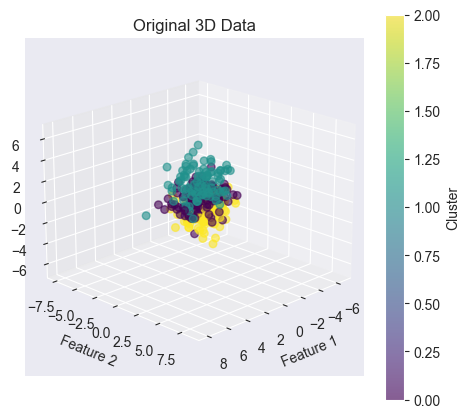

In [6]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_3d)

# Create visualization
fig1 = plt.figure(figsize=(12, 5))

# Original 3D data
ax1 = fig1.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2],
                       c=labels, cmap='viridis', alpha=0.6, s=30)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')
ax1.set_title('Original 3D Data')
ax1.view_init(elev=20, azim=45)
plt.colorbar(scatter1, ax=ax1, label='Cluster')

In [18]:
# Apply PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)

Text(0.5, 0.92, 'Scaled 3D Data with PC Axes')

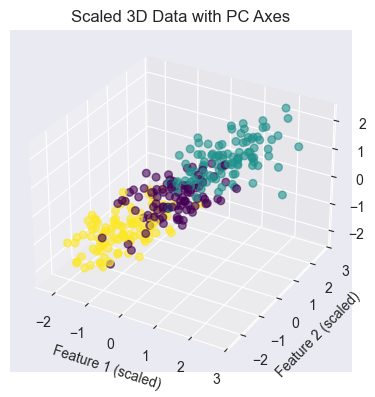

In [19]:
# Plot after PCA
fig2 = plt.figure(figsize=(15, 5))
ax1 = fig2.add_subplot(131, projection='3d')
scatter1 = ax1.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2],
                       c=labels, cmap='viridis', alpha=0.6, s=30)
ax1.set_xlabel('Feature 1 (scaled)')
ax1.set_ylabel('Feature 2 (scaled)')
ax1.set_zlabel('Feature 3 (scaled)')
ax1.set_title('Scaled 3D Data with PC Axes')

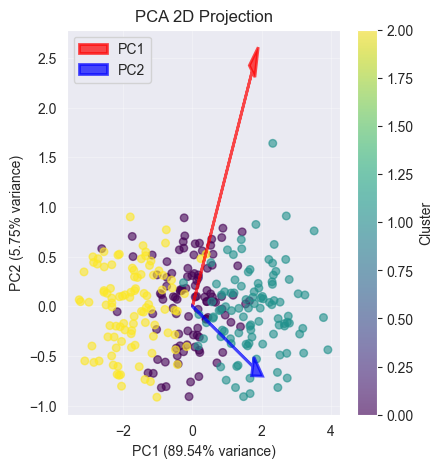

In [23]:
# PCA 2D projection
colors = ['red', 'blue']
fig3 = plt.figure(figsize=(15, 5))
ax2 = fig3.add_subplot(132)
scatter2 = ax2.scatter(data_2d[:, 0], data_2d[:, 1],
                       c=labels, cmap='viridis', alpha=0.6, s=30)
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax2.set_title('PCA 2D Projection')
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=ax2, label='Cluster')

# Add arrows showing principal components in 2D space
origin = np.zeros((2, 2))
arrows = pca.components_.T[:2] * 3
for i in range(2):
    ax2.arrow(0, 0, arrows[i, 0], arrows[i, 1],
              head_width=0.2, head_length=0.3,
              fc=colors[i], ec=colors[i], linewidth=2, alpha=0.7,
              label=f'PC{i+1}')
ax2.legend()

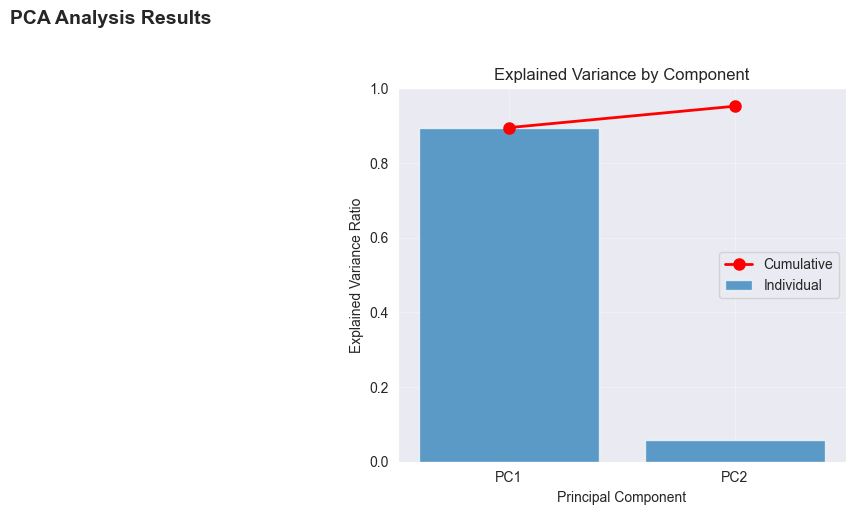

In [24]:
# Plot 3: Explained variance
fig4 = plt.figure(figsize=(15, 5))
ax3 = fig4.add_subplot(133)
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
x_pos = np.arange(len(explained_var))

ax3.bar(x_pos, explained_var, alpha=0.7, label='Individual')
ax3.plot(x_pos, cumulative_var, 'ro-', linewidth=2, markersize=8,
         label='Cumulative')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Explained Variance Ratio')
ax3.set_title('Explained Variance by Component')
ax3.set_xticks(x_pos)
ax3.set_xticklabels([f'PC{i+1}' for i in x_pos])
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.suptitle('PCA Analysis Results', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

<H1> LDA (Linear Discriminant Analysis) </h1>
LDA is an approach used in supervised machine learning to solve multi-class classification problems. LDA separates multiple classes with multiple features through data dimensionality reduction. This technique is important in data science as it helps optimize machine learning models.

In [34]:
# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
data_lda = lda.fit_transform(data_scaled, labels)

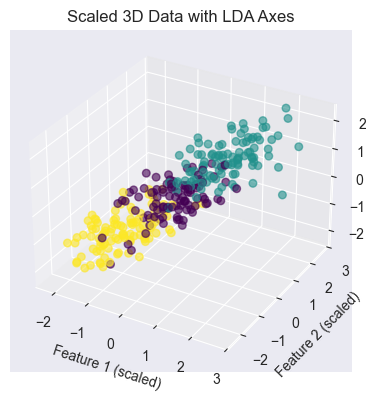

In [33]:
fig5 = plt.figure(figsize=(15, 5))
ax4 = fig5.add_subplot(131, projection='3d')
scatter1 = ax4.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2],
                       c=labels, cmap='viridis', alpha=0.6, s=30)
ax4.set_xlabel('Feature 1 (scaled)')
ax4.set_ylabel('Feature 2 (scaled)')
ax4.set_zlabel('Feature 3 (scaled)')
ax4.set_title('Scaled 3D Data with LDA Axes')
plt.show()


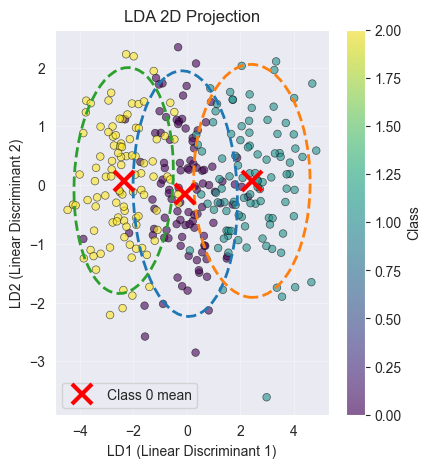

In [32]:
fig6 = plt.figure(figsize=(15, 5))
ax5 = fig6.add_subplot(132)
scatter2 = ax5.scatter(data_lda[:, 0], data_lda[:, 1],
                       c=labels, cmap='viridis', alpha=0.6, s=30, edgecolors='black', linewidth=0.5)
ax5.set_xlabel('LD1 (Linear Discriminant 1)')
ax5.set_ylabel('LD2 (Linear Discriminant 2)')
ax5.set_title('LDA 2D Projection')
ax5.grid(True, alpha=0.3)

# Add class means
for i in range(3):
    class_data = data_lda[labels == i]
    mean_x, mean_y = class_data.mean(axis=0)
    ax5.plot(mean_x, mean_y, 'x', markersize=15, markeredgewidth=3,
             color='red', label=f'Class {i} mean' if i == 0 else '')

    # Add circle around each class
    from matplotlib.patches import Ellipse
    cov = np.cov(class_data.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * 2 * np.sqrt(eigenvalues)
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle,
                     facecolor='none', edgecolor=f'C{i}', linewidth=2, linestyle='--')
    ax5.add_patch(ellipse)

ax5.legend()
plt.colorbar(scatter2, ax=ax5, label='Class')